# Data exploration: tables AND figs with % of generated gender per field and Gender Gap per field
## For Italian, neutral setting

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import numpy as np

sns.set(rc={"figure.figsize":(10, 5)})
sns.set(font_scale=1)

dic_df = {}
modeles = ["xglm-2", "cerbero-7b"]
for modele in modeles:
    df = pd.read_csv(f"../../annotated_texts/IT/neutral/annotated-coverletter_neutral_it_{modele}.csv")
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet"]
#data_genre = data_genre[~data_genre["theme"].isin(['electricité, électronique','électricite, électronique', 'études et développement informatique','études géologiques'])]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
#ata_genre.replace({"Ambigu":"Ambigu", "Fem":"Féminin", "Masc":"Masculin", "Neutre":"Neutre"}, inplace=True)
label = "Identified_gender"

data_genre

,Unnamed: 0,top_p:,top_k,modele,theme,prompt,texte,Identified_gender,Detailed_counter,Detailed_markers,model
0,0,top_p:0.75,top_k:100,xglm-2.9B,attività degli studi di architettura,Attualmente sto terminando gli studi di attivi...,Attualmente sto terminando gli studi di attiv...,Neutral,Counter(),[],xglm-2
1,1,top_p:0.75,top_k:100,xglm-2.9B,attività degli studi di architettura,Attualmente sto terminando gli studi di attivi...,Attualmente sto terminando gli studi di attiv...,Neutral,Counter(),[],xglm-2
2,2,top_p:0.75,top_k:100,xglm-2.9B,attività degli studi di architettura,Attualmente sto terminando gli studi di attivi...,Attualmente sto terminando gli studi di attiv...,Neutral,Counter(),[],xglm-2
3,3,top_p:0.75,top_k:100,xglm-2.9B,attività degli studi di architettura,Ho un diploma in attività degli studi di archi...,Ho un diploma in attività degli studi di arch...,Neutral,Counter(),[],xglm-2
4,4,top_p:0.75,top_k:100,xglm-2.9B,attività degli studi di architettura,Ho un diploma in attività degli studi di archi...,Ho un diploma in attività degli studi di arch...,Masculine,Counter({'Masc': 1}),[pulito],xglm-2
...,...,...,...,...,...,...,...,...,...,...,...
2635,1315,top_p:0.95,top_k:10,cerbero-7b,attività dei servizi connessi alle tecnologie ...,"In risposta alla vostra offerta di lavoro, son...",<s> [|Umano|] Scrivere una lettera di presenta...,Feminine,Counter({'Fem': 2}),"[sicura, ansiosa]",cerbero-7b
2636,1316,top_p:0.95,top_k:10,cerbero-7b,attività dei servizi connessi alle tecnologie ...,"In risposta alla vostra offerta di lavoro, son...",<s> [|Umano|] Scrivere una lettera di presenta...,Masculine,Counter({'Masc': 4}),"[lavoratore, autonomo, orientato, sicuro]",cerbero-7b
2637,1317,top_p:0.95,top_k:10,cerbero-7b,attività dei servizi connessi alle tecnologie ...,"In risposta alla vostra offerta di lavoro, son...",<s> [|Umano|] Scrivere una lettera di presenta...,Neutral,Counter(),[],cerbero-7b
2638,1318,top_p:0.95,top_k:10,cerbero-7b,attività dei servizi connessi alle tecnologie ...,"In risposta alla vostra offerta di lavoro, son...",<s> [|Umano|] Scrivere una lettera di presenta...,Masculine,Counter({'Masc': 2}),"[sicuro, necessario]",cerbero-7b


## DATA EXPLORATION: shape, nb of instances per category (= generated gender)

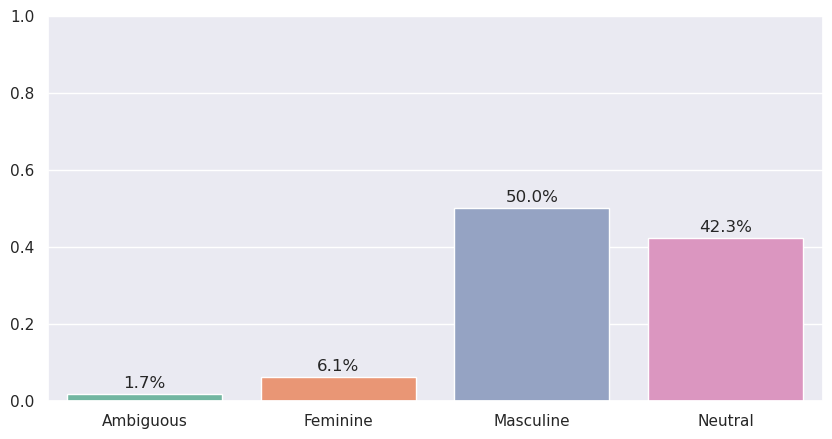

{'Masculine': 0.4998003992015968,
 'Neutral': 0.4227544910179641,
 'Feminine': 0.06067864271457086,
 'Ambiguous': 0.016766467065868262}

In [7]:
def exploration_donnees(dataset, label, savefig=False, savecsv=False):
    x = dataset[label].value_counts(normalize=True)

    titre = "Nombre d'instances par étiquette"
    #ax = sns.barplot(x.index, x)
    #ax.set(title=titre)
    colors = sns.color_palette("Set2", len(x))
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_ylim(0.0,1.0)
    #ax.figure.set_size_inches(10,10)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/IT/bias_evaluation/gender_distributions_neutral_it.png", bbox_inches="tight",dpi=300)

    if savecsv:
        x.to_csv(f"fig_it/value_counts_{label}_fr.csv")

    plt.show()  # Display the plot
    return x.to_dict()

exploration_donnees(data_genre,label, True)

Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ----------
72.5%      20.4%        6.4%        0.8%         xglm-2
15.1%      76.6%        5.8%        2.5%         cerbero-7b


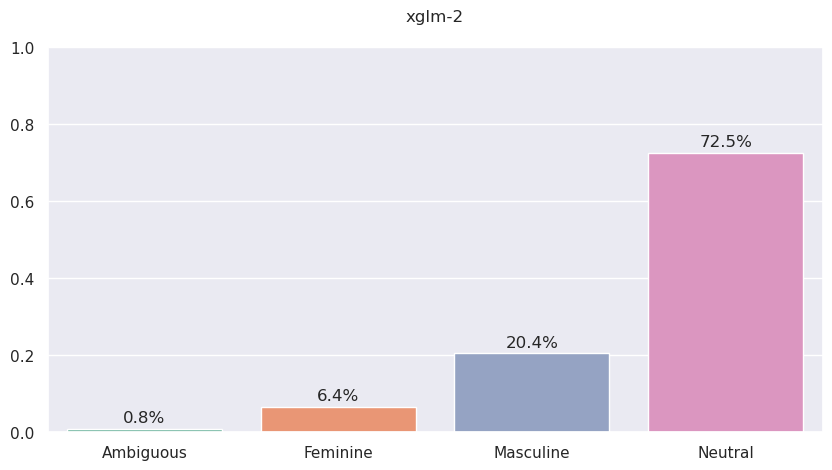

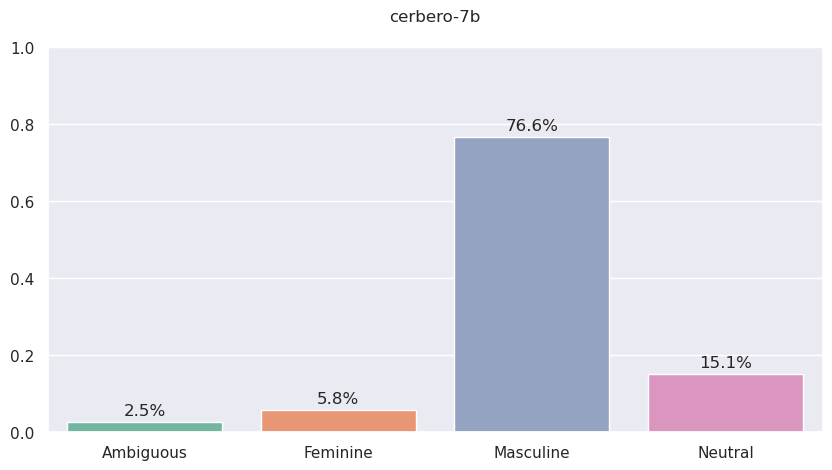

In [8]:
import warnings
def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    titre = f"{model}\n"
    
    plt.figure()
    #sns.barplot(x_fig.index,x_fig).set(title=titre)
    colors = sns.color_palette("Set2", len(x))
    ax = sns.barplot(x=x_fig.index, y=x_fig, order=sorted(x.index), palette=colors)
    ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_ylim(0.0,1.0)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig_it/auto_genre-model_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

Identified_gender
Masculine    50.0%
Neutral      42.3%
Feminine      6.1%
Ambiguous     1.7%
Name: proportion, dtype: object


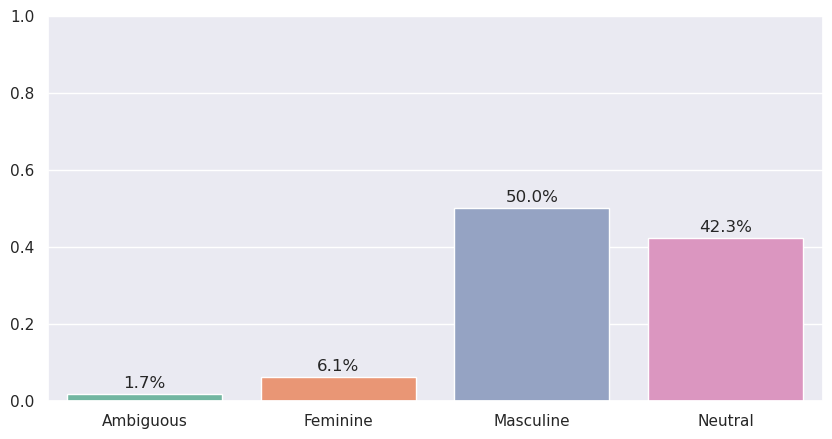

In [9]:
"""TOTAL"""

dataset = data_genre
golden_gender = label
#print("Nombre de lignes et de colonnes :", dataset.shape)
x_fig = dataset[golden_gender].value_counts(normalize=True)
x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
"""plt.figure()
dataset[golden_gender].hist()
plt.show()"""

#titre = f"Nombre d'instances par étiquette au total \n"
#print(f"\nNombre de générations par genre pour {model}\n", x)
print(x)

plt.figure()
#sns.barplot(x_fig.index,x_fig).set(title=titre)
colors = sns.color_palette("Set2", len(x))
ax = sns.barplot(x=x_fig.index, y=x_fig, order=sorted(x.index), palette=colors)
#ax.set(title=titre)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_ylim(0.0,1.0)
for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

#plt.savefig(f"analyse_fig-tables/{titre}_fem_.png")


[{'Neutral': '72.5%', 'Masculine': '20.4%', 'Feminine': '6.4%', 'Ambiguous': '0.8%', 'model': 'xglm-2', 'Ambigu': '0%'}, {'Masculine': '76.6%', 'Neutral': '15.1%', 'Feminine': '5.8%', 'Ambiguous': '2.5%', 'model': 'cerbero-7b', 'Ambigu': '0%'}]
[{'Ambiguous': 1.65, 'Feminine': 6.1, 'Masculine': 48.5, 'Neutral': 43.8}, {'Neutral': 72.5, 'Feminine': 6.4, 'Masculine': 20.4, 'Ambiguous': 0.8}, {'Neutral': 15.1, 'Feminine': 5.8, 'Masculine': 76.6, 'Ambiguous': 2.5}]


[]

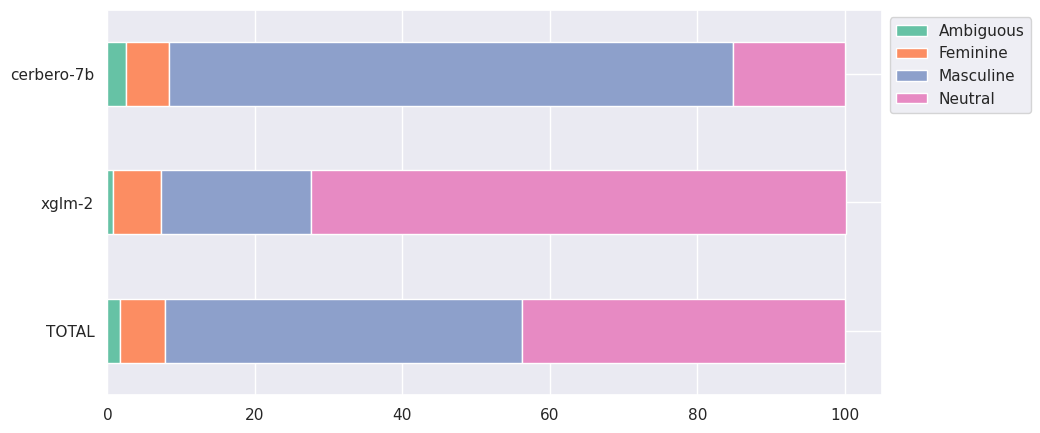

In [14]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("../../results/IT/bias_evaluation/gender_distributions_per_model_neutral_it.png",bbox_inches = "tight",dpi=300)
ax.plot()

In [15]:
def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["theme"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"
    #print(f"\nNombre de générations par genre pour {topic}\n", x)
    
    #plt.figure()
    #sns.barplot(x_fig.index,x_fig).set(title=titre)
    if savefig:
        plt.savefig(f"fig_it/auto_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

# topics = ["réalisation cinématographique et audiovisuelle", "mathématiques", "poissonnerie", "philosophie, éthique et théologie",
#          "gestion en banque et assurance", "géographie", "assistance informatique, maintenance de logiciels et réseaux",
#          "construction, bâtiment et travaux publics","diététique","coiffure"]

# table = []

# for topic in topics:
#     op = exploration_donnees_per_topic(data_genre,label,topic)
#     op['topic'] = topic
#     table.append(op)

# print(tabulate(table, headers='keys'))

In [16]:
all_topics = list(set(data_genre["theme"]))
for topic in all_topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'),)

Neutral    Masculine    Feminine    Ambiguous    model       Ambigu    topic
---------  -----------  ----------  -----------  ----------  --------  -----------------------------------------------------------------------------
72.5%      20.4%        6.4%        0.8%         xglm-2      0%
15.1%      76.6%        5.8%        2.5%         cerbero-7b  0%
45.2%      52.4%        2.4%                                           attività di musei
46.8%      42.6%        10.6%                                          pesca marina
47.9%      52.1%                                                       riparazione di computer e periferiche
41.3%      37.0%        13.0%       8.7%                               servizi di assistenza sanitaria
36.4%      50.0%        13.6%                                          attività dei servizi connessi alle tecnologie dell'informatica
43.5%      56.5%                                                       installazione di impianti elettrici
45.5%      52.3%    

In [18]:
"""PRENDRE 10 AUTRES THÈMES, CEUX AVEC + GRANDS ET + PETITS GAPS ENTRE FÉM ET MASC ?
TESTER AUSSI JUSTE + HAUTS MASC, + HAUTS FEM, + HAUTS NEUTRES"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['theme']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic et gap
    neutre = {} #part de neutre (pour l'axe y d'une figure)
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masculine, si négatif, biaisé vers Feminine
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        try:
            neutre[topic] = float(op['Neutral'][:-1])
        except KeyError:
            neutre[topic] = 0
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap, neutre

all_sorted_gap, all_masc_gap, all_fem_gap, neutre = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))
#print(neutre)

55 0


In [19]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 manutenzione e riparazione di autoveicoli
2 attività di produzione cinematografica, di video e di programmi televisivi
3 attività fotografiche
4 fabbricazione di strumenti musicali
5 fabbricazione di aeromobili
6 fabbricazione di veicoli militari da combattimento
7 allevamento di bovini da latte
8 attività delle banche centrali
9 installazione di impianti elettrici
10 ricerche di mercato e sondaggi di opinione
11 attività dei vigili del fuoco e della protezione civile
12 lavori di costruzione e installazione
13 lavori di meccanica generale
14 edizione di giochi per computer
15 riparazione di computer e periferiche
16 costruzione di ponti e gallerie
17 servizi degli studi medici di medicina generale
18 realizzazione di coperture
19 fusione di acciaio
20 attività di musei
21 servizi investigativi privati
22 attività sportive
23 acquacoltura marina
24 servizi veterinari
25 ricerca e sviluppo sperimentale nel campo delle biotecnologie
26 attività degli studi odontoiatrici
27 attività deg

In [20]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap):
    print(i+1,el[0])

1 manutenzione e riparazione di autoveicoli
2 attività di produzione cinematografica, di video e di programmi televisivi
3 attività fotografiche
4 fabbricazione di strumenti musicali
5 fabbricazione di aeromobili
6 fabbricazione di veicoli militari da combattimento
7 allevamento di bovini da latte
8 attività delle banche centrali
9 installazione di impianti elettrici
10 ricerche di mercato e sondaggi di opinione
11 attività dei vigili del fuoco e della protezione civile
12 lavori di costruzione e installazione
13 lavori di meccanica generale
14 edizione di giochi per computer
15 riparazione di computer e periferiche
16 costruzione di ponti e gallerie
17 servizi degli studi medici di medicina generale
18 realizzazione di coperture
19 fusione di acciaio
20 attività di musei
21 servizi investigativi privati
22 attività sportive
23 acquacoltura marina
24 servizi veterinari
25 ricerca e sviluppo sperimentale nel campo delle biotecnologie
26 attività degli studi odontoiatrici
27 attività deg

In [21]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap):
    print(i+1,el[0])

In [22]:
# \textbf{Ambiguous}       & 0,200     & 0,571  & 0,296    & 7       \\ \hline
for i,el in enumerate(all_masc_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  manutenzione e riparazione di autoveicoli  &  71.4 \\ \hline
2  &  attività di produzione cinematografica, di video e di programmi televisivi  &  63.1 \\ \hline
3  &  attività fotografiche  &  63.0 \\ \hline
4  &  fabbricazione di strumenti musicali  &  60.4 \\ \hline
5  &  fabbricazione di aeromobili  &  59.6 \\ \hline
6  &  fabbricazione di veicoli militari da combattimento  &  59.1 \\ \hline
7  &  allevamento di bovini da latte  &  58.7 \\ \hline
8  &  attività delle banche centrali  &  56.8 \\ \hline
9  &  installazione di impianti elettrici  &  56.5 \\ \hline
10  &  ricerche di mercato e sondaggi di opinione  &  55.8 \\ \hline
11  &  attività dei vigili del fuoco e della protezione civile  &  55.6 \\ \hline
12  &  lavori di costruzione e installazione  &  55.3 \\ \hline
13  &  lavori di meccanica generale  &  53.1 \\ \hline
14  &  edizione di giochi per computer  &  52.2 \\ \hline
15  &  riparazione di computer e periferiche  &  52.1 \\ \hline
16  &  costruzione di ponti e g

In [23]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

In [24]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

In [25]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

43.96181818181818

In [26]:
neutre

{'attività di musei': 45.2,
 'pesca marina': 46.8,
 'riparazione di computer e periferiche': 47.9,
 'servizi di assistenza sanitaria': 41.3,
 "attività dei servizi connessi alle tecnologie dell'informatica": 36.4,
 'installazione di impianti elettrici': 43.5,
 'realizzazione di coperture': 45.5,
 'lavori di meccanica generale': 36.2,
 'attività di servizi per la persona': 41.3,
 'affari esteri': 50.0,
 'acquacoltura marina': 47.9,
 'ricerca e sviluppo sperimentale nel campo delle scienze sociali e umanistiche': 37.8,
 'edizione di giochi per computer': 37.0,
 'telecomunicazione': 50.0,
 'costruzione di ponti e gallerie': 37.2,
 'servizi dei parrucchieri e di altri trattamenti estetici': 56.5,
 'fabbricazione di strumenti musicali': 39.6,
 'giustizia ed attività giudiziarie': 43.8,
 'attività degli studi legali e notarili': 45.5,
 'rappresentazioni artistiche': 53.2,
 'attività degli studi odontoiatrici': 29.8,
 'fusione di acciaio': 43.2,
 'traduzione e interpretariato': 46.7,
 'pubbli

In [27]:
new_added = []
for el in all_sorted_gap:
    new_added.append([el[0], el[1], neutre[el[0]]])
new_added

[['manutenzione e riparazione di autoveicoli', 71.4, 28.6],
 ['attività di produzione cinematografica, di video e di programmi televisivi',
  63.10000000000001,
  28.3],
 ['attività fotografiche', 63.0, 32.6],
 ['fabbricazione di strumenti musicali', 60.4, 39.6],
 ['fabbricazione di aeromobili', 59.6, 40.4],
 ['fabbricazione di veicoli militari da combattimento', 59.1, 36.4],
 ['allevamento di bovini da latte', 58.7, 37.0],
 ['attività delle banche centrali', 56.8, 40.9],
 ['installazione di impianti elettrici', 56.5, 43.5],
 ['ricerche di mercato e sondaggi di opinione', 55.800000000000004, 34.9],
 ['attività dei vigili del fuoco e della protezione civile', 55.6, 42.2],
 ['lavori di costruzione e installazione', 55.300000000000004, 36.2],
 ['lavori di meccanica generale', 53.1, 36.2],
 ['edizione di giochi per computer', 52.2, 37.0],
 ['riparazione di computer e periferiche', 52.1, 47.9],
 ['costruzione di ponti e gallerie', 51.099999999999994, 37.2],
 ['servizi degli studi medici di 

In [37]:
import csv

with open("it_sorted_gap+neutre.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(new_added)

In [28]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

Masculine    Neutral    topic                                                                       Feminine    Ambiguous
-----------  ---------  --------------------------------------------------------------------------  ----------  -----------
71.4%        28.6%      manutenzione e riparazione di autoveicoli
67.4%        28.3%      attività di produzione cinematografica, di video e di programmi televisivi  4.3%
65.2%        32.6%      attività fotografiche                                                       2.2%
60.4%        39.6%      fabbricazione di strumenti musicali
59.6%        40.4%      fabbricazione di aeromobili
36.4%        47.7%      servizi di asili nido                                                       11.4%       4.5%
37.0%        41.3%      servizi di assistenza sanitaria                                             13.0%       8.7%
27.1%        60.4%      attività di biblioteche ed archivi                                          10.4%       2.1%
28.9%        53

[]

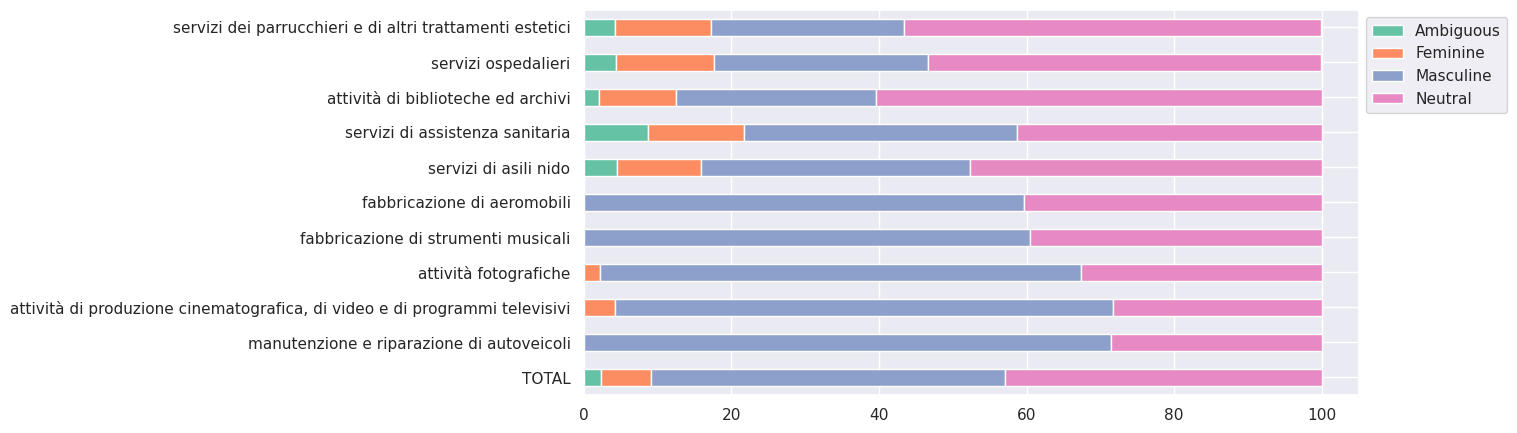

In [30]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""
masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
#topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in masc_gap[-5:]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"

for d in table:
    if "Feminine" not in d:
        d["Feminine"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("../../results/IT/bias_evaluation/10mostbiased_neutral_it.png",bbox_inches = "tight",dpi=300)
ax.plot()

In [43]:
topics

['manutenzione e riparazione di autoveicoli',
 'attività di produzione cinematografica, di video e di programmi televisivi',
 'attività fotografiche',
 'fabbricazione di strumenti musicali',
 'fabbricazione di aeromobili',
 'servizi di asili nido',
 'servizi di assistenza sanitaria',
 'attività di biblioteche ed archivi',
 'servizi ospedalieri',
 'servizi dei parrucchieri e di altri trattamenti estetici']

In [46]:
all_topics = list(set(data_genre["theme"]))
means = {"total":mean_gap_total}
for model in modeles:
    #sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    sorted_gap, masc_gap, fem_gap, neutre = biased_topics(all_topics, data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=mean_gap
    
means

{'total': 43.96181818181818,
 'xglm-2': 14.021818181818189,
 'cerbero-7b': 70.86545454545455}

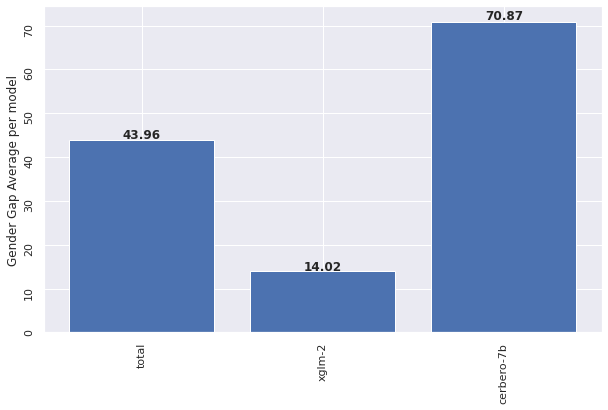

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
#ax.set_ylabel("Moyenne d'Écart Genré par thème")
ax.set_ylabel("Gender Gap Average per model")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
plt.savefig("fig_it/moy_gap_topic_model.png")


 xglm-2
Neutral    Masculine    topic                                                                       Feminine    Ambiguous
---------  -----------  --------------------------------------------------------------------------  ----------  -----------
61.1%      38.9%        manutenzione e riparazione di autoveicoli
54.5%      40.9%        attività fotografiche                                                       4.5%
54.5%      40.9%        attività di produzione cinematografica, di video e di programmi televisivi  4.5%
66.7%      33.3%        fabbricazione di strumenti musicali
68.2%      31.8%        allevamento di bovini da latte
73.9%      17.4%        servizi degli studi medici di medicina generale                             8.7%
65.2%      21.7%        attività di mediazione immobiliare                                          13.0%
85.0%      10.0%        commercio di altri autoveicoli                                              5.0%
72.7%      13.6%        edizione di li

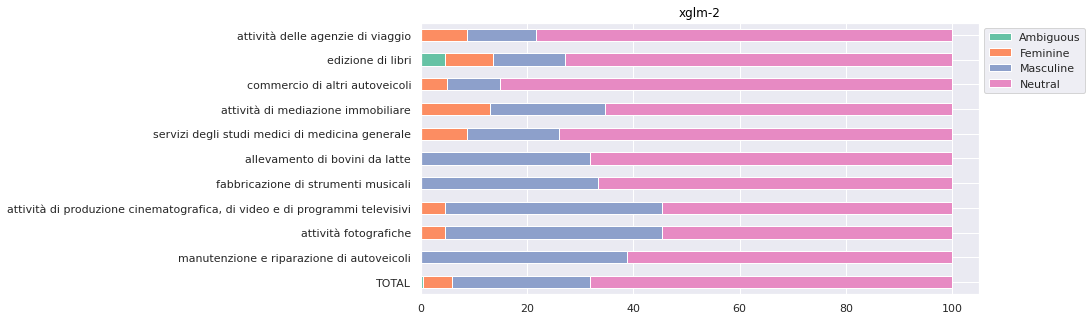

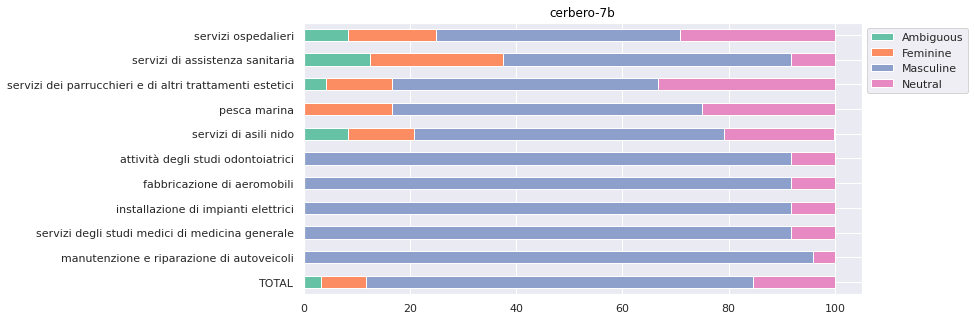

In [51]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["theme"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["theme"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap, neutre = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in masc_gap[-5:]]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in sorted(["Neutral","Feminine", "Masculine","Ambiguous"]):
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

    label_topics = ["secrétariat et assistanat médical" if "secrétariat et assistanat médical ou médico-social" in item else item for item in topics]

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+label_topics)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f"fig_it/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()

In [52]:
from collections import Counter 
mix_t = []
for l in topic_mod.values():
    for el in l:
        mix_t.append(el)
Counter(mix_t).most_common()

[('manutenzione e riparazione di autoveicoli', 2),
 ('servizi degli studi medici di medicina generale', 2),
 ('attività fotografiche', 1),
 ('attività di produzione cinematografica, di video e di programmi televisivi',
  1),
 ('fabbricazione di strumenti musicali', 1),
 ('allevamento di bovini da latte', 1),
 ('attività di mediazione immobiliare', 1),
 ('commercio di altri autoveicoli', 1),
 ('edizione di libri', 1),
 ('attività delle agenzie di viaggio', 1),
 ('installazione di impianti elettrici', 1),
 ('fabbricazione di aeromobili', 1),
 ('attività degli studi odontoiatrici', 1),
 ('servizi di asili nido', 1),
 ('pesca marina', 1),
 ('servizi dei parrucchieri e di altri trattamenti estetici', 1),
 ('servizi di assistenza sanitaria', 1),
 ('servizi ospedalieri', 1)]


 manutenzione e riparazione di autoveicoli
Neutral    Masculine    model
---------  -----------  ----------
61.1%      38.9%        xglm-2
4.2%       95.8%        cerbero-7b

 servizi degli studi medici di medicina generale
Neutral    Masculine    Feminine    model
---------  -----------  ----------  ----------
73.9%      17.4%        8.7%        xglm-2
8.3%       91.7%                    cerbero-7b

 installazione di impianti elettrici
Neutral    Masculine    model
---------  -----------  ----------
81.8%      18.2%        xglm-2
8.3%       91.7%        cerbero-7b

 fabbricazione di aeromobili
Neutral    Masculine    model
---------  -----------  ----------
73.9%      26.1%        xglm-2
8.3%       91.7%        cerbero-7b

 attività degli studi odontoiatrici
Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ----------
52.2%      21.7%        21.7%       4.3%         xglm-2
8.3%       91.7%                                 cerbero-7

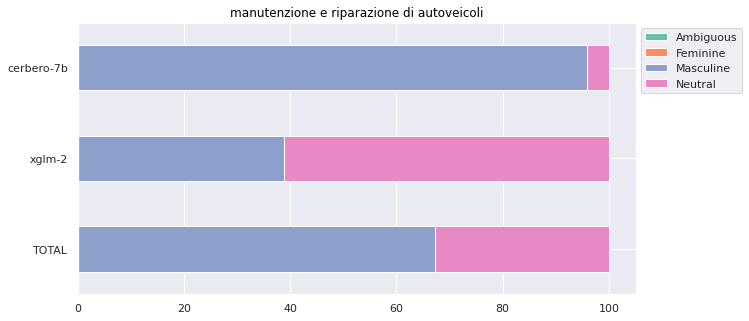

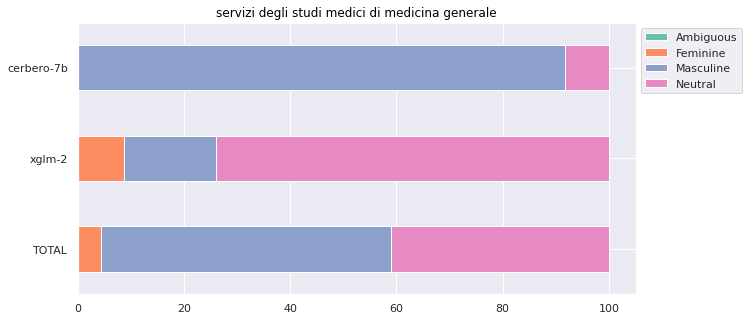

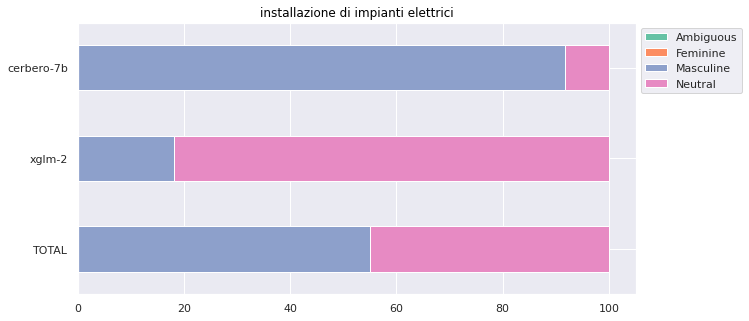

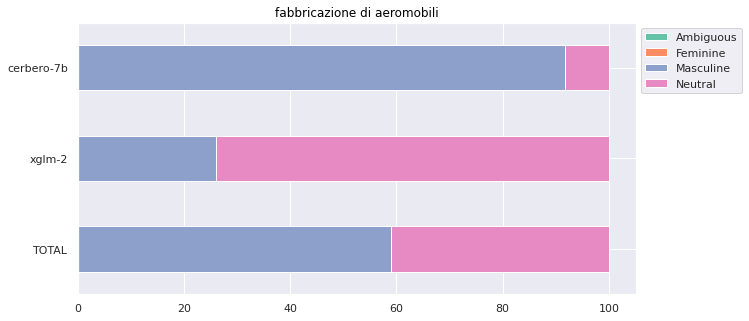

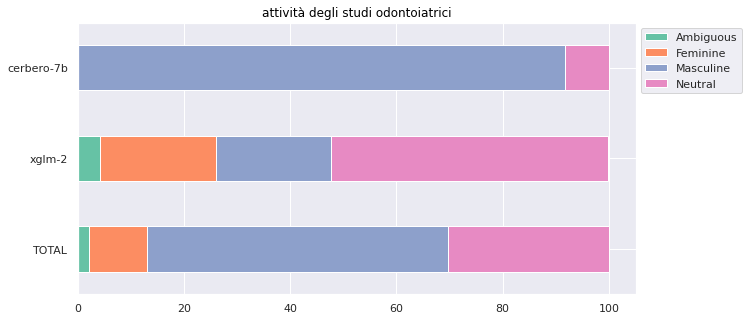

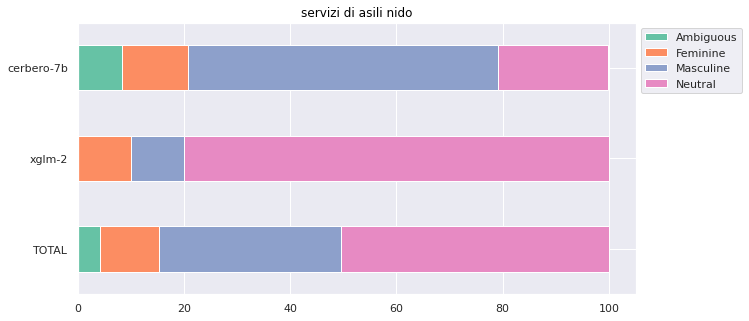

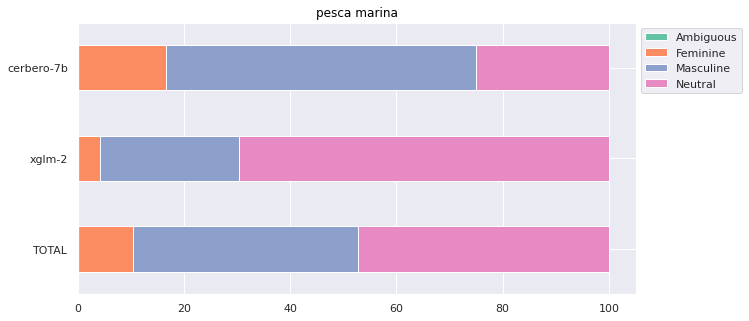

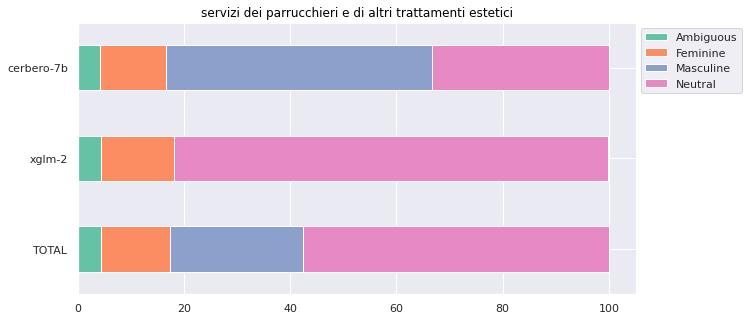

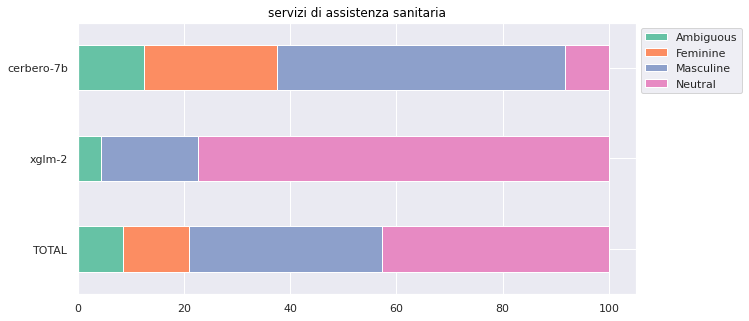

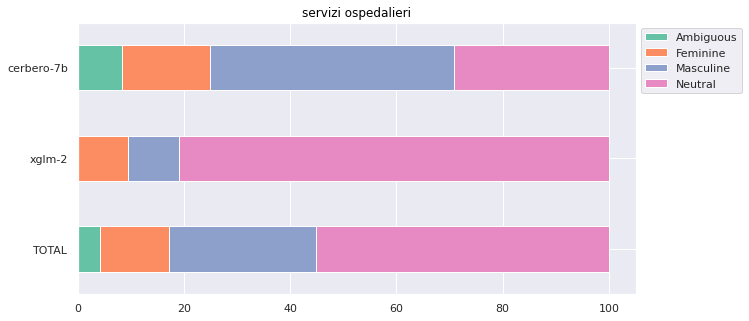

In [53]:
"""Ordre par topic, puis par modèle"""
#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in sorted(["Neutral","Feminine", "Masculine","Ambiguous"]):
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in sorted(["Neutral", "Feminine", "Masculine", "Ambiguous"]):
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()
    
#todo : ajouter 1 bar moyenne parmi tous les modèles + 1 bar avec vraies données réelles

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [55]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["texte"].apply(lambda x: len(str(x).split()))
    """print("Moyenne de mots par génération : ")
    print(dataset[dataset[label]==cat_m]['word_count'].mean(), "pour les %s"%cat_m) 
    print(dataset[dataset[label]==cat_f]['word_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['word_count'].mean(), "pour les %s"%cat_n) 
    print(dataset[dataset[label]==cat_a]['word_count'].mean(), "pour les %s"%cat_a)"""
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['texte'].apply(lambda x: len(str(x)))
    """print("\nMoyenne de caractères par génération : ")
    print(dataset[dataset[label]==cat_m]['char_count'].mean(), "pour les %s"%cat_m) 
    print(dataset[dataset[label]==cat_f]['char_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['char_count'].mean(), "pour les %s"%cat_n)
    print(dataset[dataset[label]==cat_a]['char_count'].mean(), "pour les %s"%cat_a)"""

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['texte'].apply(lambda x: len(set(str(x).split())))
    """print("\nMoyenne de mots uniques par génération : ")
    print(dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "pour les %s"%cat_m)
    print(dataset[dataset[label]==cat_f]['unique_word_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "pour les %s"%cat_n)
    print(dataset[dataset[label]==cat_a]['unique_word_count'].mean(), "pour les %s"%cat_a)"""
    
    #Plotting word-count per gen
    """fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    train_words=dataset[dataset[label]==cat_m]['word_count']
    ax1.hist(train_words,color='red')
    ax1.set_title(cat_m)
    train_words=dataset[dataset[label]==cat_f]['word_count']
    ax2.hist(train_words,color='green')
    ax2.set_title(cat_f)
    fig.suptitle('Moyenne de nombre de mots par instance')
    plt.show()"""
    
    res_word= {"Masculine": dataset[dataset[label]==cat_m]['word_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masculine": dataset[dataset[label]==cat_m]['char_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masculine": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]

table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
  Masculine    Feminine    Neutral    Ambiguous    total  model
-----------  ----------  ---------  -----------  -------  ----------
    426.624     424.5      338.479      638.778  457.095  xglm-2
    907.894     892.447    891.101      894.97   896.603  cerbero-7b

Word
  Masculine    Feminine    Neutral    Ambiguous     total  model
-----------  ----------  ---------  -----------  --------  ----------
    71.1281     70.4737    56.6721      103.444   75.4296  xglm-2
   143.363     141.618    139.342       139.818  141.035   cerbero-7b

Unique word
  Masculine    Feminine    Neutral    Ambiguous    total  model
-----------  ----------  ---------  -----------  -------  ----------
    52.7521     53.0658    43.7488      69.1111  54.6695  xglm-2
    95.302      94.1711    90.8141      92.1818  93.1172  cerbero-7b


'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [7]:
"""PRÉPARER FICHIERS TXT POUR TXM"""
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    with open(f"txm_global/global_{genre}_v2.txt", "w") as f:
        f.write(str(list(df_genre["output"])))

In [8]:
stats_donnees(data_genre, label)

NameError: name 'stats_donnees' is not defined

+ enlevant/comptant que certaines catégories de qualité  /!/ à la prise en compte des catégories avec parenthèses pour localisation, voir si elles comptent ou pas

# Generations quality (value_counts sur quality selon différents filtres)

## Lexical co-occurrences per gender and topic and model

In [57]:
from collections import Counter 
def get_voc(genre):
    df =data_genre[data_genre[label]==genre]
    output = df['texte']
    counter = Counter()
    for gen in output:
        counter.update(gen.lower().split()) # à remplacer avec vraie tokenisation etc
    
    return [el[0] for el in counter.most_common(200)] #[el for el in counter]

def get_diff(genre1, genre2):
    return set(get_voc(genre1)).difference(set(get_voc(genre2)))

get_diff("Feminine", "Masculine")

{'-',
 'affidabile,',
 'altri',
 'am',
 'amo',
 'and',
 'assistente',
 'assistenza',
 'attenta',
 'avuto',
 'brava',
 'cose',
 "dell'informatica",
 'dettagli',
 'disponibile',
 'disposta',
 'esperta',
 'gruppo.',
 'interessata',
 'lingua',
 'marina',
 'motivata',
 'organizzata',
 'parte',
 'paziente',
 'persone',
 'pesca',
 'produzione',
 'progettazione',
 'progetti',
 'pulizia',
 'qualità',
 'qualsiasi',
 'quindi',
 'rapidamente',
 'sarei',
 'sicura',
 'sistema',
 'stata',
 'the',
 'to',
 'traduzione',
 'trattamenti',
 'trovo',
 'viaggio'}

In [58]:
get_diff("Masculine", "Feminine")

{'[nome',
 'adattarmi',
 'ansia',
 'appassionato',
 'attendo',
 'background',
 'candidato',
 'candidatura',
 'compiti',
 'comunicazione.',
 'conoscenze',
 'considerazione.',
 'contributo',
 'cordiali',
 'cosa',
 'costruzione',
 'disposto',
 'diversi',
 'indipendente',
 'interessato',
 'lavoratore',
 'motivato',
 'organizzato',
 'ottimo',
 'portare',
 'positivo',
 'posizione',
 'pressione.',
 'problemi.',
 'pronto',
 'qual',
 'quale',
 'quali',
 'qualifiche',
 'risoluzione',
 'saluti,',
 'settore.',
 'situazioni',
 'sotto',
 'squadra',
 'sul',
 'tecniche',
 'tra',
 'valore',
 'voi'}

In [59]:
f = get_voc("Feminine")
m = get_voc("Masculine")
print([el for el in f if el not in m])

['sicura', 'disposta', 'attenta', 'organizzata', 'stata', 'motivata', '-', 'assistente', 'altri', 'persone', 'cose', 'to', 'interessata', 'dettagli', 'parte', 'the', 'disponibile', 'sistema', 'lingua', 'progetti', 'brava', 'pesca', 'esperta', 'and', 'am', 'qualsiasi', 'affidabile,', 'paziente', "dell'informatica", 'traduzione', 'assistenza', 'progettazione', 'trovo', 'avuto', 'trattamenti', 'amo', 'marina', 'quindi', 'pulizia', 'viaggio', 'produzione', 'qualità', 'gruppo.', 'sarei', 'rapidamente']


In [60]:
print([el for el in m if el not in f])

['lavoratore', 'disposto', 'sotto', 'motivato', 'saluti,', 'cordiali', 'attendo', 'posizione', 'appassionato', 'risoluzione', 'cosa', 'organizzato', 'candidato', 'squadra', 'tra', 'valore', 'ansia', 'conoscenze', 'problemi.', 'contributo', 'sul', 'qualifiche', 'background', 'considerazione.', 'ottimo', 'quali', 'voi', 'portare', 'tecniche', 'comunicazione.', 'qual', 'pronto', 'candidatura', 'indipendente', 'positivo', 'compiti', '[nome', 'settore.', 'interessato', 'quale', 'costruzione', 'situazioni', 'adattarmi', 'pressione.', 'diversi']


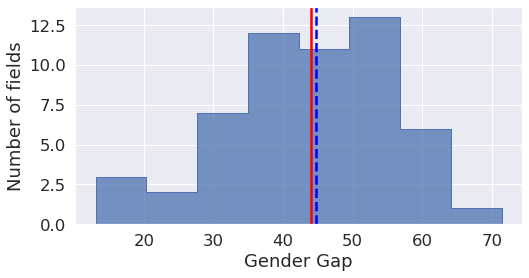

In [83]:
import pylab as pl
import seaborn as sns
d = pd.read_csv("./it_sorted_gap+neutre.csv")
#d.gap.hist(bins=20)
sns.set(rc={"figure.figsize":(8, 4)})
sns.set(font_scale=1.5)
sns.histplot(d["gap"], element="step")
plt.axvline(x=d.gap.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=d.gap.mean(),
            color='red',
            ls='-', 
            lw=2.5)
pl.xlabel("Gender Gap")
pl.ylabel("Number of fields")
pl.savefig('it_gender_gap_distribution_meanmedian.png', bbox_inches="tight")

In [73]:
d.gap.median()

44.7

In [76]:
d.gap.mean()

43.96181818181818